0<h3><center>Estudiar el problema (qué variables intervienen)</center></h3>
<p><center>Para ello, nos dirigimos a la página del problema https://www.kaggle.com/competitions/titanic/data?select=train.csv</center></p>


In [56]:
import pandas as pd #importing pandas
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing matplotlib
import seaborn as sns #importing seaborn
import sklearn.model_selection as ms #importing sklearn.model_selection
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "/home/dm/Desktop/titanic/g.png")


In [57]:
Image(url= "/home/dm/Desktop/titanic/v.png")

In [58]:
train = pd.read_csv('train.csv') #reading train.csv
test = pd.read_csv('test.csv') #reading test.csv
pd.DataFrame(train).head() #printing first 5 rows of train dataframe


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
pd.DataFrame(test).head() #printing first 5 rows of test dataframe

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
titanic_df = train.append(test, ignore_index=True) #appending train and test dataframes

/tmp/ipykernel_859/2748062732.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titanic_df = train.append(test, ignore_index=True) #appending train and test dataframes


In [61]:
titanic_df.dtypes #printing data types of titanic_df

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<h3><center>Normalizar nombres de las columnas</center></h3>
<p><center>Para ello, utilizaremos la función `.str.upper()` para convertir todos los nombres de las columnas a mayúsculas, y luego utilizaremos la función `str.replace()` + `str_strip()` para eliminar los espacios en blanco.

* Hazlo con algo parecido a: `data.rename(columns=lambda x: x.strip().replace(' ', '_').upper())`</center></p>






In [62]:
titanic_df = titanic_df.rename(columns= lambda x: x.strip().replace(' ', '_').upper()) #renaming columns
titanic_df.head() 

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3><center>Estudiar tipados de columnas</center></h3>
<p><center>* Variables cuantitativas .* Variables categóricas .* Variables ordinales .* Variables de fecha .* Variables de texto (cualitativas)</center></p>



In [63]:
titanic_df.dtypes #printing data types of titanic_df


PASSENGERID      int64
SURVIVED       float64
PCLASS           int64
NAME            object
SEX             object
AGE            float64
SIBSP            int64
PARCH            int64
TICKET          object
FARE           float64
CABIN           object
EMBARKED        object
dtype: object

In [64]:
colnames = list(titanic_df.columns) #creating a list of column names
for i in colnames:
    print(i, titanic_df[i].dtype)
    

PASSENGERID int64
SURVIVED float64
PCLASS int64
NAME object
SEX object
AGE float64
SIBSP int64
PARCH int64
TICKET object
FARE float64
CABIN object
EMBARKED object


<h3><center>Estudiar valores faltantes</center></h3>
<p><center>*Porcentaje de valores faltantes por variable. ¿Se puede considerar eliminar alguna variable?
¿Cómo rellenaríais los valores faltantes?</center></p>




In [65]:
titanic_df.info() #printing info of titanic_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PASSENGERID  1309 non-null   int64  
 1   SURVIVED     891 non-null    float64
 2   PCLASS       1309 non-null   int64  
 3   NAME         1309 non-null   object 
 4   SEX          1309 non-null   object 
 5   AGE          1046 non-null   float64
 6   SIBSP        1309 non-null   int64  
 7   PARCH        1309 non-null   int64  
 8   TICKET       1309 non-null   object 
 9   FARE         1308 non-null   float64
 10  CABIN        295 non-null    object 
 11  EMBARKED     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [66]:
import re #importing re

def get_title(name): #defining a function to get TITLE
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the TITLE exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

titanic_df['TITLE'] = titanic_df['NAME'].apply(get_title) #applying get_TITLE function to extract TITLE from name

titanic_df['TITLE'].unique()    #printing unique values of TITLE column

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

<h3><center>Understanding TITLEs</center></h3>
<center>
   <p>  Youngers: boys and youngs
   <p>  Don/Donna/Lady/Sir/Countess/Jonkheer: royal TITLEs </p>
   <p>  Rev:  priest </p>
   <p>  Mme/Ms: single people </p>
   <p>  Major/Col/Capt: military  </p>
   <p>  Mlle: married woman </p>
</center>

In [67]:
titanic_df['TITLE'] = titanic_df['TITLE'].replace(['Ms','Mlle'],'Miss') #replacing 'Ms' and 'Mlle' with 'Miss'
titanic_df['TITLE'] = titanic_df['TITLE'].replace('Mme','Mrs') #replacing 'Mme' with 'Mrs'
titanic_df['TITLE'] = titanic_df['TITLE'].replace(['Don','Dona','Lady','Sir','Countess','Jonkheer'],'Royal') #replacing 'Don' with 'Royal'
titanic_df['TITLE'] = titanic_df['TITLE'].replace(['Major','Col','Capt'],'Military') #replacing 'Major' and 'Col' with 'Military'
titanic_df['TITLE'] = titanic_df['TITLE'].replace(['Rev'],'Priest') #replacing 'Rev' with 'Priest'
titanic_df['TITLE'] = titanic_df['TITLE'].replace(['Dr'],'Medical') #replacing 'Dr' with 'Medical'

titanic_df['TITLE'].unique()   #printing unique values of TITLE column

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royal', 'Priest', 'Medical',
       'Military'], dtype=object)

In [68]:
#first we want change nun to 0 in age variables of titanic_df
titanic_df["AGE"].fillna(0, inplace=True)


#replacing missing values of age with median age of each TITLE is better than common median model because it is more robust
def impute_age(row):
    
    # Features from row
    pclass = row['PCLASS']
    title = row['TITLE']
    age = row['AGE']
    
    if age == 0:
        return int(round(titanic_df.loc[(titanic_df['AGE']!=0)&
                                      (titanic_df['PCLASS']==pclass)&
                                      (titanic_df['TITLE']==title)]['AGE'].mean(),1))
    else:
        return age
    
titanic_df['AGE'] = titanic_df.apply(impute_age,axis=1)

Group 1: (20.128, 30.106]
Group 2: (30.106, 40.085]
Group 3: (50.064, 60.043]
Group 4: (0.0902, 10.149]
Group 5: (10.149, 20.128]
Group 6: (40.085, 50.064]
Group 7: (60.043, 70.021]
Group 8: (70.021, 80.0]


<AxesSubplot:>

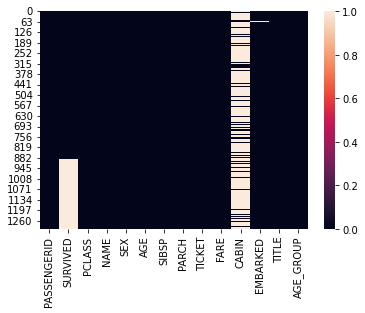

In [69]:
#age classification 
splits = 8
for i in range(splits):
    print(f'Group {i+1}:',pd.cut(titanic_df['AGE'].dropna(), splits).unique()[i])
        
titanic_df['AGE_GROUP'] = pd.cut(titanic_df['AGE'].dropna(), splits)

group_age = titanic_df.groupby('AGE_GROUP')['AGE']
sns.heatmap(titanic_df.isnull()) #heatmap of null values

In [70]:
titanic_df_duplicates = titanic_df.duplicated() #are im sure there are no duplicates in titanic_df?, fk dont understand why survived data is missing
print('Number of duplicate entries is/are {}'.format(titanic_df_duplicates.sum()))

Number of duplicate entries is/are 0


In [71]:
#survived is missing in test dataframe so we need to fill whit median of survived in train dataframe
titanic_df['SURVIVED'].fillna(titanic_df['SURVIVED'].median(), inplace=True)

In [72]:
titanic_df = titanic_df.drop(["CABIN"] , axis=1) #dropping cabin column
titanic_df = titanic_df.drop(["PASSENGERID"] , axis=1) #dropping cabin column



<AxesSubplot:>

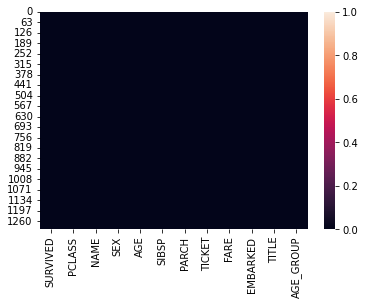

In [73]:
titanic_df["EMBARKED"] = titanic_df["EMBARKED"].fillna("S") #filling null values of embarked with S

sns.heatmap(titanic_df.isnull()) #heatmap of null values


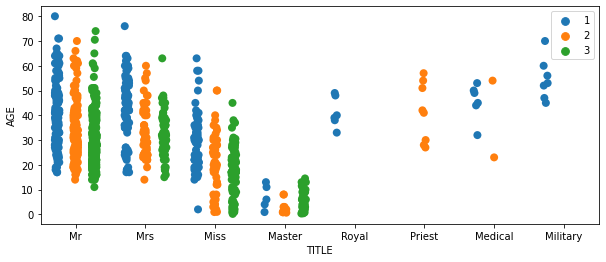

In [74]:
plt.figure(figsize=(10,4)) 
sns.stripplot(x='TITLE',y='AGE',data=titanic_df[titanic_df['AGE']!=0], #plotting stripplot of age vs title
              hue='PCLASS',dodge=True, size=8)

plt.legend(loc=1) #hows change in age with respect to TITLE and class? lets see and plot 


#renaming columns

Quieren saber : 

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.


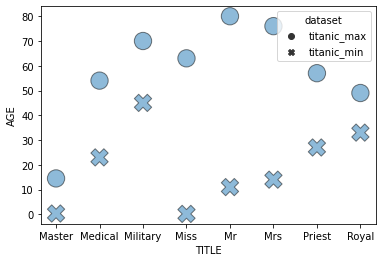

None             AGE      dataset
TITLE                       
Master    14.50  titanic_max
Medical   54.00  titanic_max
Military  70.00  titanic_max
Miss      63.00  titanic_max
Mr        80.00  titanic_max
Mrs       76.00  titanic_max
Priest    57.00  titanic_max
Royal     49.00  titanic_max
Master     0.33  titanic_min
Medical   23.00  titanic_min
Military  45.00  titanic_min
Miss       0.17  titanic_min
Mr        11.00  titanic_min
Mrs       14.00  titanic_min
Priest    27.00  titanic_min
Royal     33.00  titanic_min


In [75]:
titanic_max = pd.DataFrame(titanic_df.groupby('TITLE')['AGE'].max()) #creating a dataframe of max age of each TITLE
titanic_min = pd.DataFrame(titanic_df.groupby('TITLE')['AGE'].min()) #creating a dataframe of min age of each TITLE

titanic_max_min = pd.concat([titanic_max.assign(dataset='titanic_max'), titanic_min.assign(dataset='titanic_min')])     #concatenating titanic_max and titanic_min dataframes
sns.scatterplot(x='TITLE', y='AGE', data=titanic_max_min, style='dataset', palette='Set1', s=300, alpha=0.5, linewidth=1, edgecolor='black', ) #plotting scatterplot of max and min age of each TITLE
 
print(plt.show(), titanic_max_min)

In [76]:
mean_age_title = titanic_df.groupby('TITLE')['AGE'].mean() #printing mean age of each TITLE
mean_age_title = pd.DataFrame(mean_age_title, columns=['AGE']) #creating a dataframe of mean age of each TITLE
mean_age_title

,AGE
TITLE,
Master,5.550492
Medical,43.750000
Military,54.714286
Miss,20.964356
Mr,31.795905
Mrs,36.757576
Priest,41.250000
Royal,41.166667


<AxesSubplot:xlabel='TITLE', ylabel='AGE'>

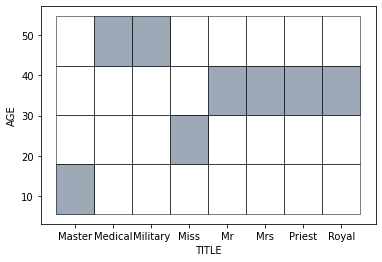

In [77]:
sns.histplot(x='TITLE', y='AGE', data=mean_age_title,  palette='Set1', alpha=0.5, linewidth=1, edgecolor='black', ) #plotting histogram of mean age of each TITLE

<AxesSubplot:xlabel='TITLE', ylabel='FARE'>

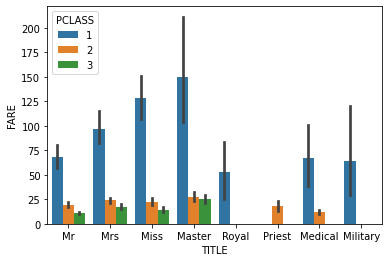

In [78]:
sns.barplot(x='TITLE', y='FARE', data=titanic_df, hue='PCLASS' ) #plotting scatterplot of fare vs title

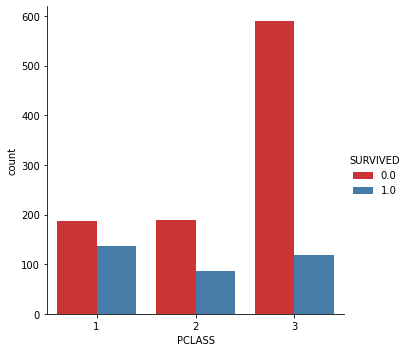

In [79]:
sns.catplot(x='PCLASS',  data=titanic_df, hue='SURVIVED', kind='count', palette='Set1') #plotting count of survived vs class

<AxesSubplot:ylabel='SURVIVED'>

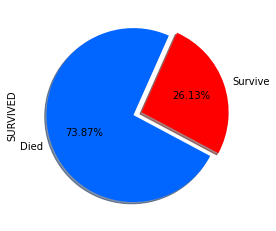

In [80]:
explode = [0,0.1]
titanic_df['SURVIVED'].value_counts().plot.pie(explode=explode, autopct='%1.2f%%', shadow=True, startangle=66, colors=['#0066ff', '#ff0000'], labels=['Died', 'Survive'] ) #plotting pie chart of survived vs died


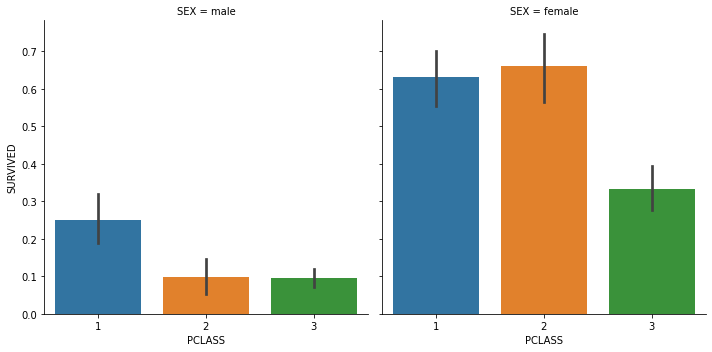

In [81]:
sns.catplot(x='PCLASS', y='SURVIVED', kind='bar', data=titanic_df, col='SEX')

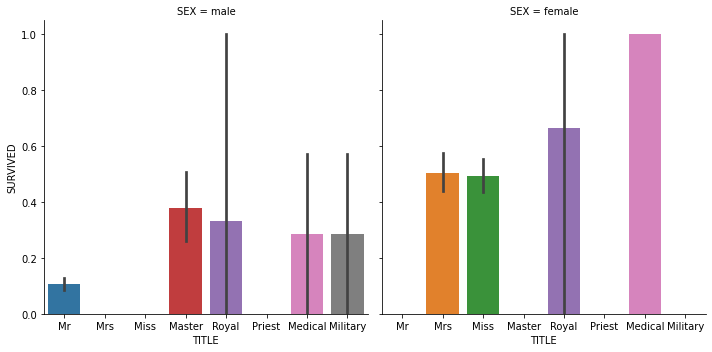

In [82]:
sns.catplot(x='TITLE', y='SURVIVED', kind='bar', data=titanic_df, col='SEX')

In [83]:
import plotly.express as px # importing plotly 

fig = px.pie(titanic_df, names='SURVIVED', title='Passenger Survival', hole=0.3)
fig.show()





ModuleNotFoundError: No module named 'plotly'

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(labels=titanic_df['SEX'].value_counts().index, values=titanic_df['SEX'].value_counts(), name='Sex'), row=1, col=1)
fig.add_trace(go.Pie(labels=titanic_df['PCLASS'].value_counts().index, values=titanic_df['PCLASS'].value_counts(), name='Class'), row=1, col=2)
fig.add_trace(go.Pie(labels=titanic_df['TITLE'].value_counts().index, values=titanic_df['TITLE'].value_counts(), name='Title'), row=1, col=3)


In [ ]:
fig = px.box(titanic_df, x='PCLASS', y="AGE", color='SURVIVED',)
fig.show()

In [ ]:
fig = px.box(titanic_df, x='TITLE', y="AGE", color='SURVIVED')
fig.show()

In [ ]:
fig = px.density_heatmap(titanic_df, x="SURVIVED", y="AGE")
fig.show()

In [ ]:
 
titanic_words = titanic_df['NAME'].str.split(' ').tolist() #splitting name column into words
titanic_words = [item for sublist in titanic_words for item in sublist] #flattening the list
titanic_words = pd.DataFrame(titanic_words) #creating a dataframe of words
titanic_words.columns = ['NAME'] #renaming column
titanic_words['NAME'] = titanic_words['NAME'].str.replace('\.', '') #removing . from words  
titanic_words['NAME'] = titanic_words['NAME'].str.replace('"', ' ') #removing , from words
titanic_words['NAME'] = titanic_words['NAME'].str.replace(',', ' ') #removing , from words




<ipython-input-448-56e8e69fb21c>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:

titanic_words = titanic_words[titanic_words["NAME"].str.contains("Mr|Mrs|Miss|Master|Royal|Priest|Medical|Military")==False]

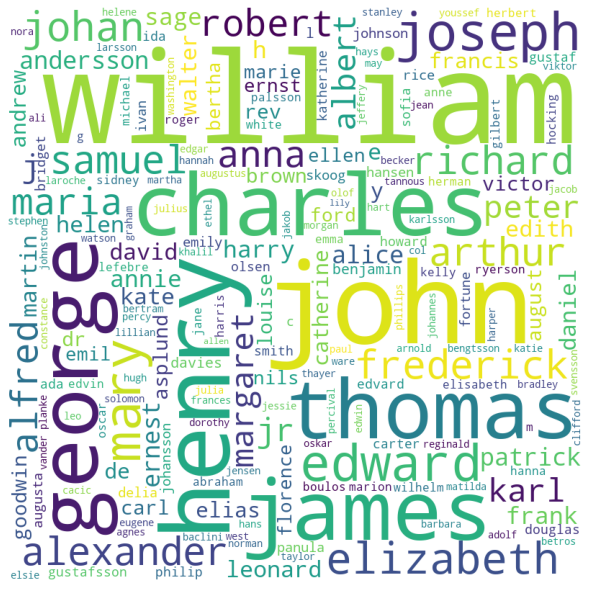

In [ ]:

 #creating a word cloud of words in name column
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 

palabras = ''
stopwords = set(STOPWORDS)
 
for val in titanic_words.NAME:
     
    val = str(val) 
    tokens = val.split()     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    palabras += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(palabras)
 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()



In [ ]:
titanic_df

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,EMBARKED,TITLE,AGE_GROUP
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Adult
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Adult
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Adult
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Adult
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S,Mr,Adult
1305,0.0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Royal,Adult
1306,0.0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,Adult
1307,0.0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S,Mr,Adult


In [ ]:
titanic_familys = titanic_df["AGE_GROUP"] = titanic_df["AGE"].apply(lambda x: "Child" if x < 18 else "Adult")

#add a column name in titatic familys
titanic_familys.columns = ["AGE_GROUP"]
titanic_familys = pd.DataFrame(titanic_familys)
titanic_familys

,AGE
0,Adult
1,Adult
2,Adult
3,Adult
4,Adult
...,...
1304,Adult
1305,Adult
1306,Adult
1307,Adult


In [ ]:
titanic_familys.value_counts()
fig = px.pie(titanic_familys, names='AGE', title='ADULTS VS CHILDS', hole=0.3, color_discrete_sequence=['#0066ff', '#ff0000'])
fig.show()

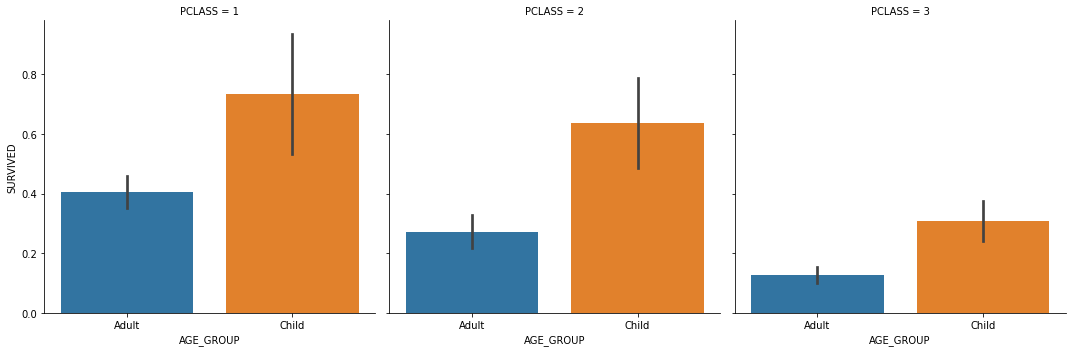

In [ ]:
sns.catplot(x='AGE_GROUP', y='SURVIVED', kind='bar', data=titanic_df, col='PCLASS')

In [ ]:
#save to csv new dataframe
titanic_df.to_csv('titanic_df.csv',

In [ ]:
titanic_df

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,EMBARKED,TITLE,AGE_GROUP
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,"(20.128, 30.106]"
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,"(30.106, 40.085]"
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,"(20.128, 30.106]"
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,"(30.106, 40.085]"
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,"(30.106, 40.085]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S,Mr,"(20.128, 30.106]"
1305,0.0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Royal,"(30.106, 40.085]"
1306,0.0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,"(30.106, 40.085]"
1307,0.0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S,Mr,"(20.128, 30.106]"


In [ ]:
lifeboats = pd.read_csv('Lifeboats.csv')
lifeboats = lifeboats.drop(['Unnamed: 0'], axis=1)
lifeboats['launch_time'] = lifeboats['launch'].apply(lambda x: x.split(' ')[1])
lifeboats.drop(['launch'], axis=1, inplace=True)



,side,boat,crew,men,women,total,cap,launch_time
0,Port,7,3,4,20,27,65,00:45:00
1,Port,5,5,6,30,41,65,00:55:00
2,Port,3,15,10,25,50,65,01:00:00
3,Port,1,7,3,2,12,40,01:10:00
4,Port,9,8,6,42,56,65,01:20:00
5,Port,11,9,1,60,70,65,01:25:00
6,Port,13,5,0,59,64,65,01:35:00
7,Port,15,13,4,53,70,65,01:35:00
8,Port,C,5,2,64,71,47,01:40:00
9,Starboard,6,2,2,24,28,65,00:55:00


<AxesSubplot:xlabel='launch_time'>

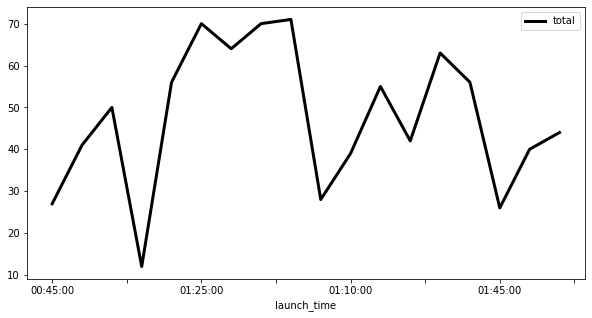

In [ ]:
lifeboats.plot(x='launch_time', y='total', kind='line', figsize=(10,5), color='#000000', linewidth=3)

/var/data/python/lib/python3.9/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


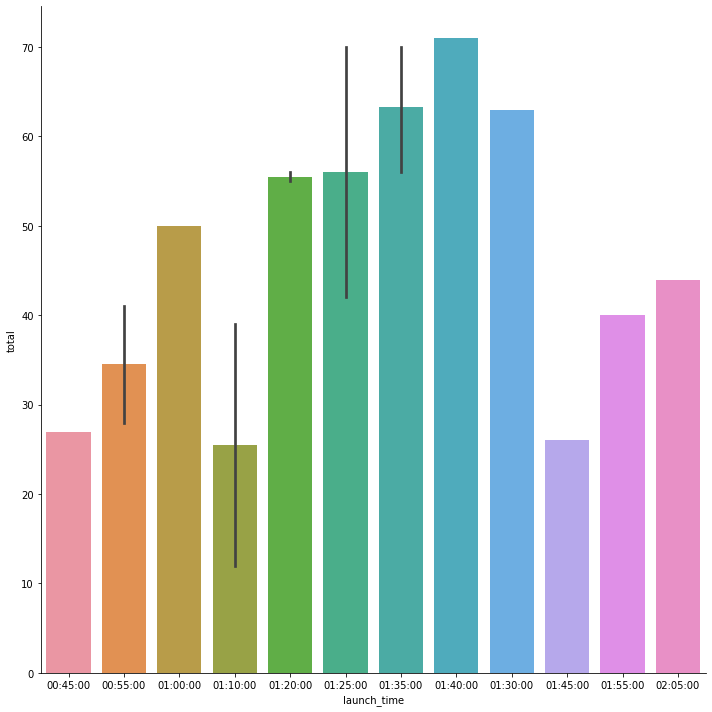

In [97]:
#plot the graph cap vs total
sns.catplot(x='launch_time', y='total', kind='bar', data=lifeboats, size=10)

In [98]:
lifeboats.value_counts()

side       boat  crew  men  women  total  cap  launch_time
Port       1     7     3    2      12     40   01:10:00       1
           11    9     1    60     70     65   01:25:00       1
Starboard  8     4     0    35     39     65   01:10:00       1
           6     2     2    24     28     65   00:55:00       1
           4     4     0    36     40     65   01:55:00       1
           2     4     1    21     26     40   01:45:00       1
           16    6     0    50     56     65   01:35:00       1
           14    8     2    53     63     65   01:30:00       1
           12    2     0    40     42     65   01:25:00       1
           10    5     0    50     55     65   01:20:00       1
Port       C     5     2    64     71     47   01:40:00       1
           9     8     6    42     56     65   01:20:00       1
           7     3     4    20     27     65   00:45:00       1
           5     5     6    30     41     65   00:55:00       1
           3     15    10   25     50     65 

In [108]:
import plotly.express as px

fig = px.scatter_3d(lifeboats, x='launch_time', y='total', z='cap', color='cap', size='cap', title='Lifeboats')
fig.show()